# Project VI - Solution of Initial Value Problems

In [1]:
#################### DO NOT CHANGE ####################
# All libraries will be imported in this cell
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve as fs
from tabulate import tabulate as table
######################################################

Consider the initial-value-problem:

$$
\begin{align*}
x^{''}(t)+2\gamma x^{'}+\omega^{2} x(t)=0 \\
x(0)=x_0 \\ 
x^{'}(0)=\gamma x_0
\end{align*}
$$

with $0 < \gamma < \omega$. It's solution is given by
$$x(t)=x_0 e^{-\gamma t} \cos(\beta t)$$

where $\beta = \sqrt{\omega^{2}-\gamma^{2}}$. This equation can be written as a first order system, with $x^{'}=y$, and $y^{'}=-2\gamma y - \omega^2 x$.

In [2]:
#################### DO NOT CHANGE ####################
global x0, steps, gamma, omega
######################################################

## Your task

### Explicit Midpoint

Implement the Explicit Midpoint method (EMP) doing
$$\frac{x_{n+1}−x_{n−1}}{2h}=y_n\\
\frac{y_{n+1}−y_{n−1}}{2h}=−2\gamma y_n− \omega^2x_n $$

In [3]:
#################### DO NOT CHANGE ####################
def mid_point():    
    y = np.zeros(steps+1)
    xl = np.zeros(steps+1)
    
    xp0 = x0 * gamma
    
    xl[0] = x0
    y[0] = xp0
    
    for i in range(0, steps):
        if i == 0:
            xl[i+1] = 2 * h * y[i]
            y[i+1] = -4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
        else:
            xl[i+1] = xl[i-1] + 2*  h * y[i]
            y[i+1] = y[i-1] - 4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
    return xl
######################################################

### Implicit Midpoint

Implement the Implicit Midpoint method (IMP) doing
$$ \frac{x_{n+1}−x_n}{h}=\frac{y_{n+1}+y_n}{2}\\
\frac{y_{n+1}−y_n}{h}=−2\gamma \frac{y_{n+1}+y_n}{2}−\omega^2\frac{x_{n+1}+x_n}{2}$$

In [4]:
#################### DO NOT CHANGE ####################
def IMP(p):
    X, Y = p
    
    deriv = np.array([0., 0.])
    deriv[0] = (Y + x_imp[1]) / 2 - (X - x_imp[0]) / h
    deriv[1] = -2 * gamma * (Y + x_imp[1]) / 2 - omega**2 * (X + x_imp[0]) / 2 - (Y - x_imp[1]) / h
    
    return deriv

def implicit_mid_point():    
    global x_imp
    x_imp = np.array([x0, xp0])
    traj = x_imp

    for i in range(1, steps+1):
        x_new = fs(IMP, x_imp) 
        traj = np.vstack([traj, x_new])
        x_imp = x_new
    
    return traj
######################################################

### Non-Standard Implicit Midpoint

Implement the Non-standard Implicit Midpoint method (NSIMP) doing
$$\frac{x_{n+1}−e^{−\gamma h}x_n}{h}=\frac{y_{n+1}+e^{−\gamma h}y_n}{2}\\
\frac{y_{n+1}−e^{−\gamma h}y_n}{h}=−\omega^2\frac{x_{n+1}+e^{−\gamma h}x_n}{2}$$

In [5]:
#################### DO NOT CHANGE ####################
def NSIMP(p):
    X, Y = p
    deriv = np.array([0., 0.])
    deriv[0] = (Y + np.exp(-gamma * h) * x_nsimp[1]) / 2 - (X - np.exp(-gamma * h) * x_nsimp[0]) / h
    deriv[1] = -omega**2 * (X + np.exp(-gamma * h) * x_nsimp[0]) / 2 - (Y - np.exp(-gamma * h) * x_nsimp[1]) / h
    
    return deriv

def ns_implicit_mid(): 
    global x_nsimp
    x_nsimp = np.array([x0, xp0])
    traj = x_nsimp

    for i in range(1, steps+1):
        x_new = fs(NSIMP, x_nsimp) 
        traj = np.vstack([traj, x_new])
        x_nsimp = x_new
    
    return traj
######################################################

 - All three methods are second order and they do not differ much in terms of computational cost; demonstrate this numerically.  I expect several table with the results.

 - For $\gamma=0$  the  implicit  methods  are  equivalent,  and  we  expect  they  are  superior  to  the explicit method; check this numerically using long time simulations with varioush, $\omega$, $x_0$.

- Experiment on the long-time accuracy of the methods for small values of $\gamma>0$.

- Run experiments to help you fully understand what happens to the approximations as $\gamma$ increases.

- If there is, in fact, a ’breaking point’ for any method as $\gamma$ increases determine what it is and how it depends upon $h$ or $\omega$.

In [6]:
#################### DO NOT CHANGE ####################
def exact():
    y = np.zeros(steps+1)
    b = np.sqrt((omega**2) - (gamma**2))
    
    for i in range(0, (steps+1)):
        y[i] = x0 * np.exp(-gamma * t[i]) * np.cos(b * t[i])
    return y

def relative_error(exact, approx, steps):
    rel = np.zeros((steps+1,))
    
    for i in range(0, steps+1):
        rel[i] = abs(exact[i] - approx[i]) / abs(exact[i])
        
    return rel
######################################################

In [7]:
#################### DO NOT CHANGE ####################
def results(t, x_m, x_i, x_n, err1, err2, err3, x_ex):
    return list(zip(range(x_m.shape[0]), t, x_m, x_i, x_n, err1, err2, err3, x_ex))
######################################################

In [32]:
#################### DO NOT CHANGE ####################
def main():
    global t0, h, xp0, t

    t0 = 0
    tf = 1
    h = (tf - t0) / steps
    xp0 = x0 * gamma
    t = np.arange(t0, tf + h, h)

    x_m = mid_point()
    x_i = implicit_mid_point()
    x_n = ns_implicit_mid()
    x_ex = exact()

    error_mid = relative_error(x_ex, x_m, steps)
    error_imp = relative_error(x_ex, x_i[:,0], steps)
    error_nsimp = relative_error(x_ex, x_n[:,0], steps)
    error_exact = relative_error(x_ex, x_ex, steps)
    
    title1 = "Exact solution and methods: gamma=" + str(gamma) + ", omega=" + str(omega)
    plt.figure(figsize=(20,10))
    plt.plot(t, x_ex, "limegreen", label="Exact Solution")
    plt.plot(t, x_m, "cornflowerblue", label="EMP")
    plt.plot(t, x_i[:,0], "blueviolet", label="IMP")
    plt.plot(t, x_n[:,0], "darkorange", label="NSIMP")
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title(title1)
    plt.legend(loc="upper right", fontsize="small")
    plt.show()

    plt.figure(figsize=(20,10))
    plt.plot(t, error_exact, "limegreen", label="Exact Error")
    plt.plot(t, error_mid, "cornflowerblue", label="EMP Error")
    plt.plot(t, error_imp, "blueviolet", label="IMP Error")
    plt.plot(t, error_nsimp, "darkorange", label="NSIMP Error")
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title("Errors")
    plt.legend(loc="upper right", fontsize="small")
    plt.show()

    print()
    print(f"Testing using: steps = {steps}, x0 = {x0}, gamma = {gamma}, omega = {omega}.", end="\n\n\n\n")
    table_results = results(t, x_m, x_i[:,0], x_n[:,0], error_mid, error_imp, error_nsimp, x_ex)
    print(table(table_results, headers=["n", "t", "EMP", "IMP", "NSIMP", "EMP Error", "IMP Error", "NSIMP Error", "Exact Solution"]))
    
    return
######################################################

### Testing `steps`, `x0`, `gamma` & `omega` begins here.

#### Testing instructions:
Please **do not add, edit, or delete** anything marked with: `#################### DO NOT CHANGE ####################`

When testing different values, copy and paste the following snippet in separate cells:
```python
steps = 10
x0 = 1
gamma = 0.1
omega = 1
main()
```

- Change ONLY ONE parameter at a time (parameters: `steps`, `x0`, `gamma`, and `omega`)
- Add a comment in respective code cell or in Markdown cell below outputs about changes you've noticed
- To see the changes in errors, look at the last row in table see how close the errors are to 0
- If you notice that any values go into the negatives, please add: `### BREAKING POINT ###` at the top of the code cell
- Keep all of your testing results


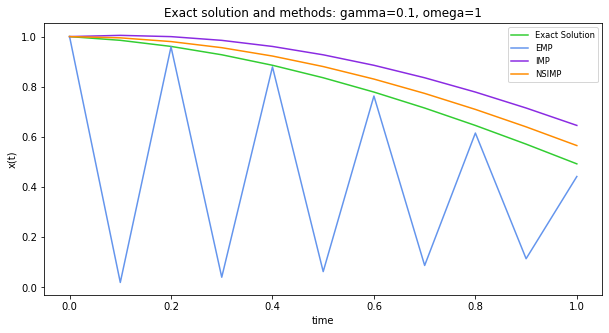

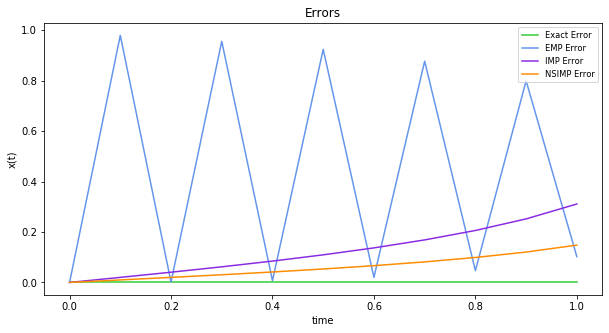


Testing using: steps = 10, x0 = 1, gamma = 0.1, omega = 1.



  n    t        EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ---  ---------  --------  --------  -----------  -----------  -------------  ----------------
  0  0    1          1         1          0             0             0                   1
  1  0.1  0.02       1.00494   0.994988   0.979699      0.0200833     0.00998282          0.985153
  2  0.2  0.9592     0.999854  0.98015    0.00172211    0.0405878     0.0200813           0.960855
  3  0.3  0.040832   0.984994  0.955829   0.955978      0.0619517     0.0305077           0.927532
  4  0.4  0.879199   0.9607    0.922456   0.00733363    0.0846864     0.0415059           0.885694
  5  0.5  0.0632308  0.927398  0.880542   0.924358      0.10943       0.0533769           0.835923
  6  0.6  0.763134   0.885594  0.830674   0.0202012     0.137027      0.0665156           0.778868
  7  0.7  0.0877429  0.835868  0.773509   0.877323   

In [9]:
# SCENARIO 1:

# (Adding comment about results in code cell)
# Using the values below, I noticed that there was a significant error with IMP, 
# but that EMP appears to have the smallest error (0.102301) and is the closest to 0.

steps = 10
x0 = 1
gamma = 0.1
omega = 1
main()

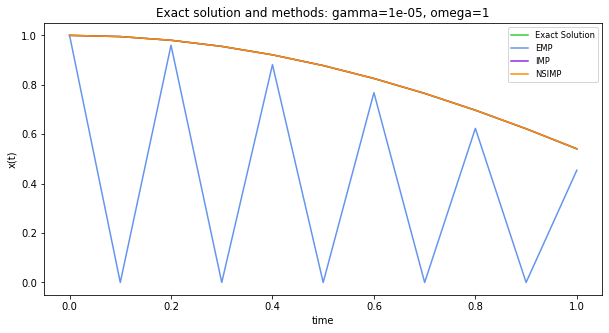

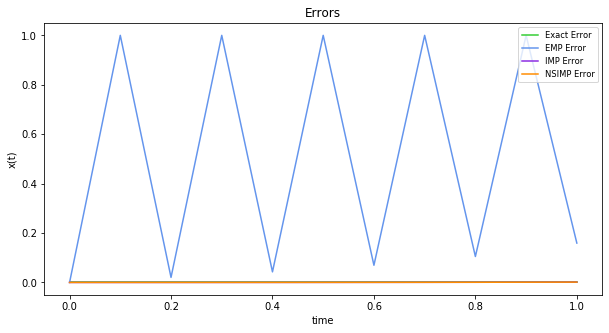


Testing using: steps = 10, x0 = 1, gamma = 1e-05, omega = 1.



  n    t          EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ---  -----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0    1            1         1           0          0              0                    1
  1  0.1  2e-06        0.995013  0.995012    0.999998   1.03528e-05    9.34776e-06          0.995003
  2  0.2  0.96         0.980102  0.9801      0.0204727  3.77764e-05    3.5746e-05           0.980065
  3  0.3  4.08e-06     0.955413  0.95541     0.999996   8.33763e-05    8.0278e-05           0.955334
  4  0.4  0.8816       0.921195  0.921191    0.0428391  0.000149124    0.000144889          0.921057
  5  0.5  6.3104e-06   0.877787  0.877782    0.999993   0.000238129    0.000232658          0.877578
  6  0.6  0.767936     0.825624  0.825618    0.0695414  0.000355119    0.000348268          0.825331
  7  0.7  8.74304e-06  0.765225  

In [10]:
# SCENARIO 2:
# (Adding comments in Markdown cell)
steps = 10
x0 = 1
gamma = 0.00001
omega = 1
main()

#### SCENARIO 2:
When using `gamma = 0.00001`, the errors for `IMP` and `NSIMP` are closer to 0, but the error for `EMP` grew significantly compared to `gamma = 0.1`.

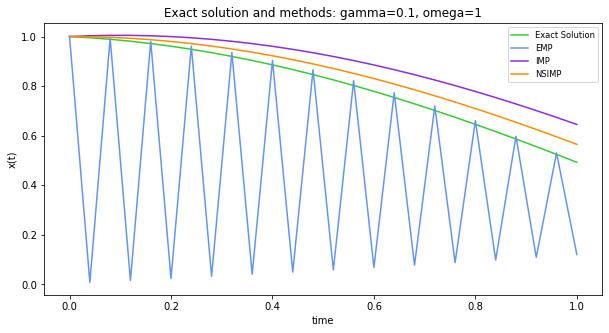

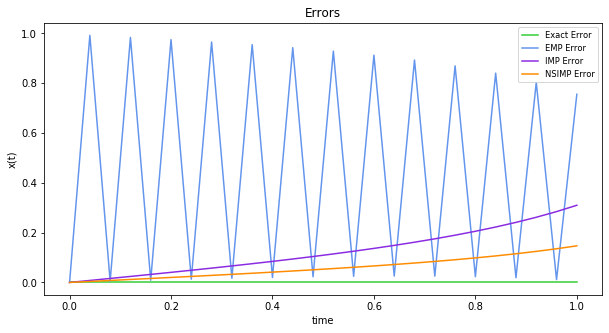


Testing using: steps = 25, x0 = 1, gamma = 0.1, omega = 1.



  n     t        EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ---------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1          1         1          0             0             0                   1
  1  0.04  0.008      1.00319   0.999194   0.991962      0.008005      0.00399378          0.995219
  2  0.08  0.993472   1.00475   0.996787   0.00463265    0.0160358     0.00798457          0.988891
  3  0.12  0.0160532  1.0047    0.992795   0.983636      0.0241183     0.011985            0.981037
  4  0.16  0.980457   1.00305   0.987238   0.00902985    0.0322788     0.0160081           0.971683
  5  0.2   0.024212   0.999812  0.980136   0.974802      0.0405447     0.020067            0.960855
  6  0.24  0.961036   0.99501   0.971514   0.0131296     0.0489449     0.0241755           0.948582
  7  0.28  0.0325265  0.988661  0.961398   0

In [11]:
# SCENARIO 3:
# Changing gamma back to 0.1, and steps to 25: the error for EMP grew significantly (0.755411), compared to (0.102301) when steps = 10. 
# There weren't any significant changes in errors for IMP and NSIMP.
steps = 25
x0 = 1
gamma = 0.1
omega = 1
main()

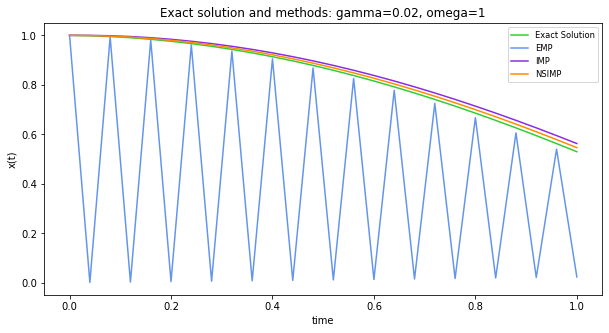

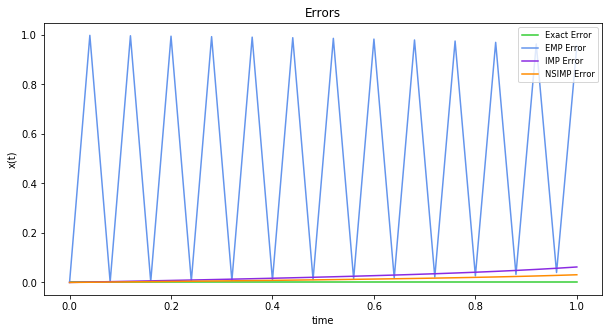


Testing using: steps = 25, x0 = 1, gamma = 0.02, omega = 1.



  n     t         EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1           1         1          0            0             0                    1
  1  0.04  0.0016      1         0.9992     0.998397     0.00160117    0.000800213          0.998401
  2  0.08  0.993595    0.998402  0.996804   0.00162227   0.00320791    0.00160278           0.995209
  3  0.12  0.00321026  0.995211  0.992819   0.996759     0.00482541    0.00241029           0.990432
  4  0.16  0.980826    0.990434  0.987252   0.00330531   0.00645903    0.00322542           0.984078
  5  0.2   0.00484083  0.984083  0.980116   0.995041     0.0081143     0.00405093           0.976162
  6  0.24  0.961774    0.976169  0.971425   0.0050939    0.00979706    0.00488972           0.966698
  7  0.28  0.00650139  0.966707  0

In [12]:
steps = 25
x0 = 1
gamma = 0.02
omega = 1
main()

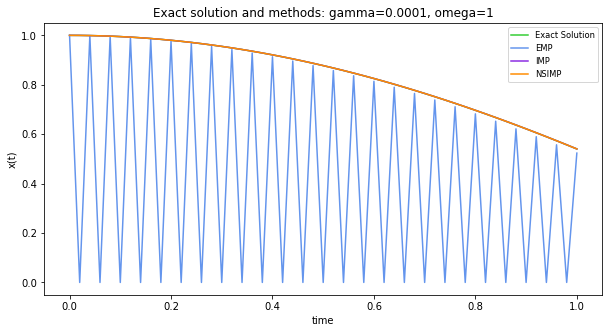

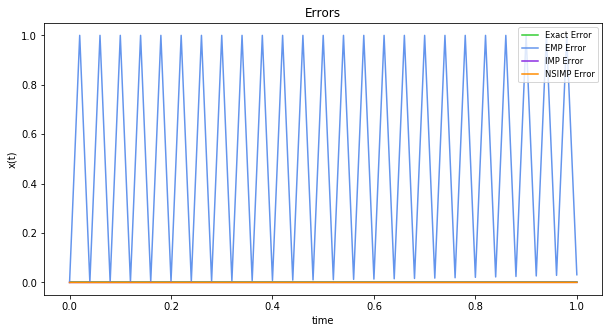


Testing using: steps = 50, x0 = 1, gamma = 0.0001, omega = 1.



  n     t          EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  -----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1            1         1          0           0              0                    1
  1  0.02  4e-06        0.999802  0.9998     0.999996    4.01393e-06    2.01353e-06          0.999798
  2  0.04  0.9984       0.999204  0.9992     0.00079675  8.05776e-06    4.05535e-06          0.999196
  3  0.06  8.0064e-06   0.998207  0.998201   0.999992    1.21348e-05    6.12713e-06          0.998195
  4  0.08  0.995203     0.99681   0.996802   0.00159629  1.62483e-05    8.23058e-06          0.996794
  5  0.1   1.20256e-05  0.995015  0.995005   0.999988    2.04017e-05    1.03675e-05          0.994994
  6  0.12  0.990413     0.992821  0.992809   0.00240122  2.45985e-05    1.25397e-05          0.992797
  7  0.14  1.60638e-05 

In [13]:
steps = 50
x0 = 1
gamma = 0.0001
omega = 1
main()

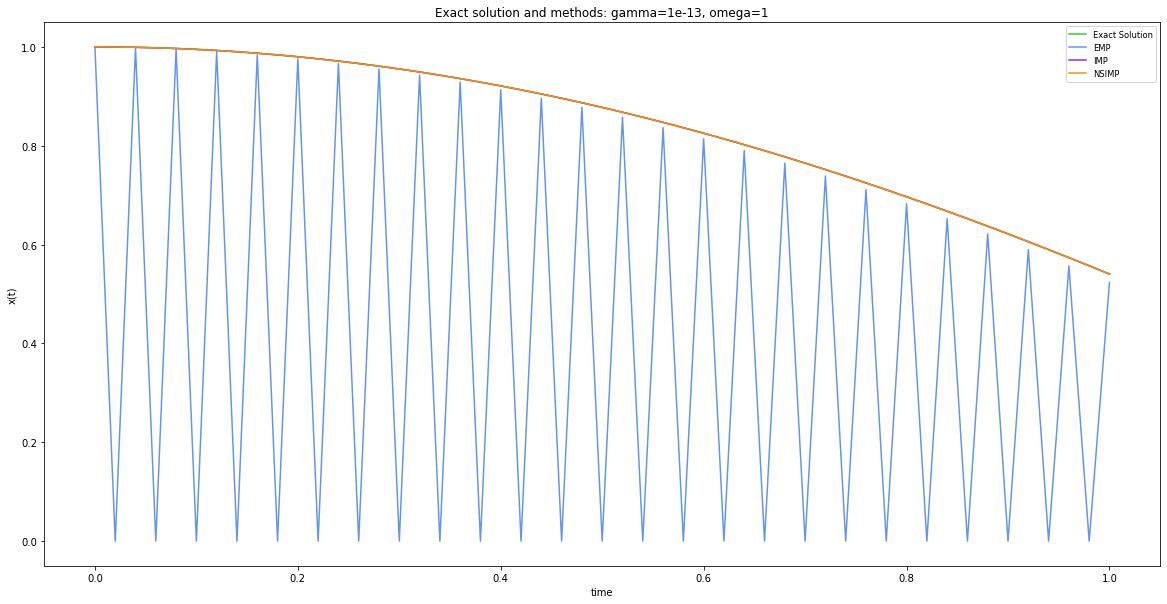

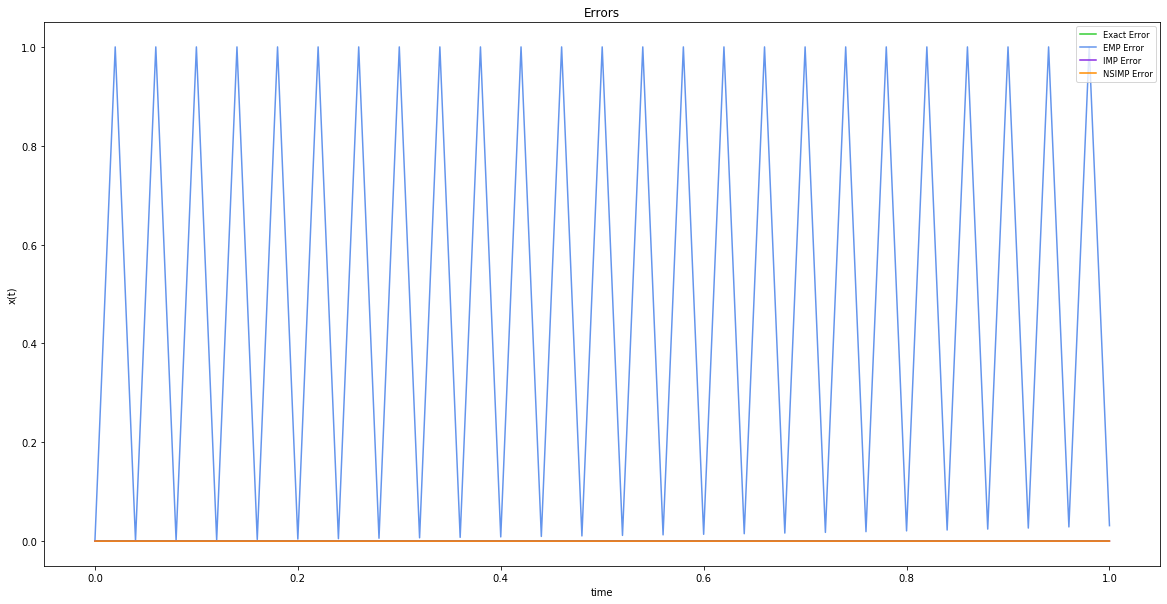


Testing using: steps = 50, x0 = 1, gamma = 1e-13, omega = 1.



  n     t          EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  -----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1            1         1         0            0              0                    1
  1  0.02  4e-15        0.9998    0.9998    1            1.33341e-08    1.33341e-08          0.9998
  2  0.04  0.9984       0.9992    0.9992    0.000800747  5.33577e-08    5.33577e-08          0.9992
  3  0.06  8.0064e-15   0.998201  0.998201  1            1.20135e-07    1.20135e-07          0.998201
  4  0.08  0.995203     0.996802  0.996802  0.00160428   2.13773e-07    2.13773e-07          0.996802
  5  0.1   1.20256e-14  0.995004  0.995004  1            3.34423e-07    3.34423e-07          0.995004
  6  0.12  0.990413     0.992809  0.992809  0.00241319   4.8228e-07     4.8228e-07           0.992809
  7  0.14  1.60638e-14  0.99

In [52]:
# When gamma <= 1e-13, we obtain the same results for IMP and NSIMP.
steps = 50
x0 = 1
gamma = 1e-13
omega = 1
main()

/usr/local/Caskroom/miniconda/base/envs/num-methods/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


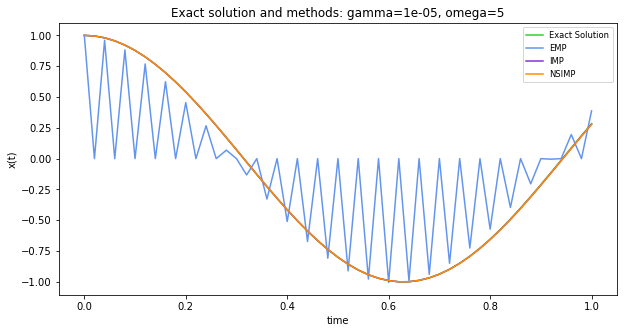

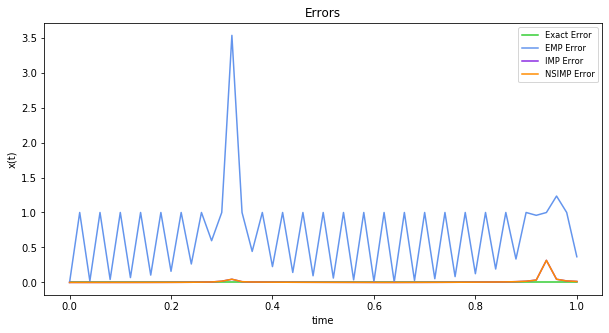


Testing using: steps = 50, x0 = 1, gamma = 1e-05, omega = 5.



  n     t           EMP         IMP       NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ------------  ----------  ----------  -----------  -----------  -------------  ----------------
  0  0      1             1           1           0           0              0                   1
  1  0.02   4e-07         0.995013    0.995012    1           8.74675e-06    8.54574e-06         0.995004
  2  0.04   0.96          0.9801      0.9801      0.0204743   3.45317e-05    3.41257e-05         0.980066
  3  0.06   8.16e-07      0.955411    0.95541     0.999999    7.8425e-05     7.78053e-05         0.955336
  4  0.08   0.8816        0.921191    0.921191    0.0428422   0.000142356    0.00014151          0.92106
  5  0.1    1.26208e-06   0.877783    0.877782    0.999999    0.000229385    0.00022829          0.877582
  6  0.12   0.767936      0.825619    0.825618    0.0695459   0.000344169    0.000342799     

In [14]:
steps = 50
x0 = 1
gamma = 1e-5
omega = 5
main()

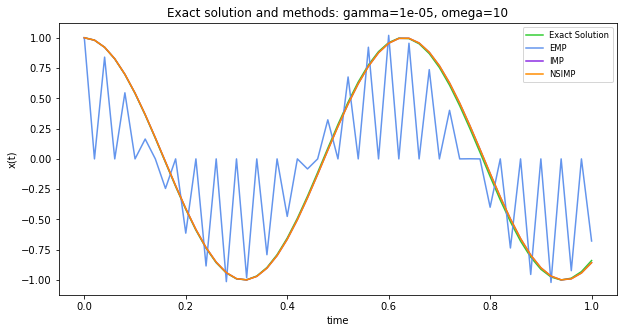

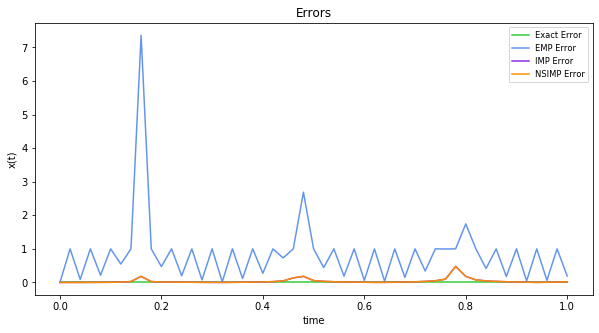


Testing using: steps = 50, x0 = 1, gamma = 1e-05, omega = 10.



  n     t           EMP         IMP       NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ------------  ----------  ----------  -----------  -----------  -------------  ----------------
  0  0      1             1           1            0          0              0                   1
  1  0.02   4e-07         0.980198    0.980198     1          0.000134521    0.000134317         0.980066
  2  0.04   0.84          0.921577    0.921576     0.0880079  0.000560334    0.000559909         0.921061
  3  0.06   8.64e-07      0.826457    0.826457     0.999999   0.00135952     0.00135883          0.825335
  4  0.08   0.5456        0.698607    0.698606     0.216886   0.00272789     0.00272686          0.696706
  5  0.1    1.42528e-06   0.543089    0.543088     0.999997   0.00515805     0.00515649          0.540302
  6  0.12   0.163904      0.366062    0.366061     0.547673   0.0102245      0.0102219     

In [15]:
steps = 50
x0 = 1
gamma = 1e-5
omega = 10
main()

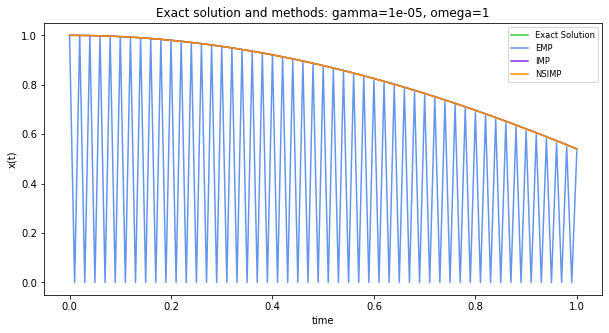

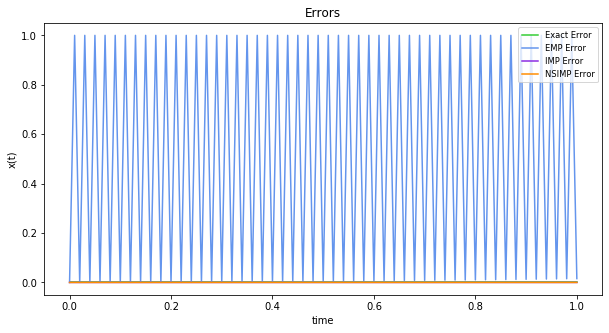


Testing using: steps = 100, x0 = 1, gamma = 1e-05, omega = 1.



  n     t          EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  -----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1            1         1         0            0              0                    1
  1  0.01  2e-07        0.99995   0.99995   1            2.00841e-07    1.00836e-07          0.99995
  2  0.02  0.9996       0.9998    0.9998    0.000199847  4.03389e-07    2.03359e-07          0.9998
  3  0.03  4.0008e-07   0.99955   0.99955   1            6.07685e-07    3.0759e-07           0.99955
  4  0.04  0.9988       0.999201  0.9992    0.000399867  8.1377e-07     4.1355e-07           0.9992
  5  0.05  6.0032e-07   0.998751  0.99875   0.999999     1.02169e-06    5.21263e-07          0.99875
  6  0.06  0.997601     0.998201  0.998201  0.000600222  1.23148e-06    6.30751e-07          0.9982
  7  0.07  8.00799e-07  0.997552

In [16]:
steps = 100
x0 = 1
gamma = 1e-5
omega = 1
main()

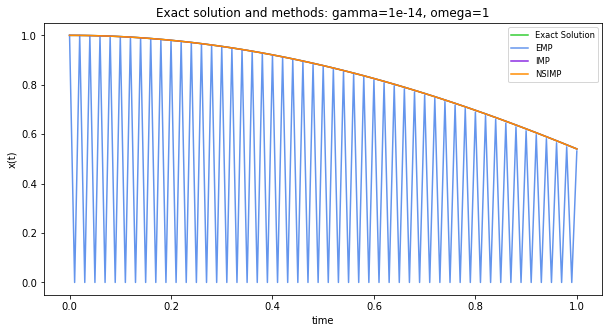

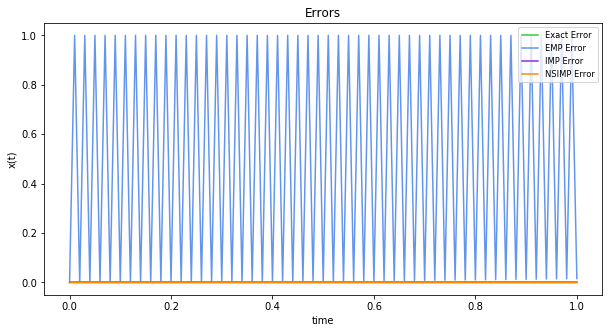


Testing using: steps = 100, x0 = 1, gamma = 1e-14, omega = 1.



  n     t          EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  -----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1            1         1         0            0              0                    1
  1  0.01  2e-16        0.99995   0.99995   1            8.33345e-10    8.33345e-10          0.99995
  2  0.02  0.9996       0.9998    0.9998    0.000200047  3.33371e-09    3.33371e-09          0.9998
  3  0.03  4.0008e-16   0.99955   0.99955   1            7.50211e-09    7.50211e-09          0.99955
  4  0.04  0.9988       0.9992    0.9992    0.000400267  1.33402e-08    1.33402e-08          0.9992
  5  0.05  6.0032e-16   0.99875   0.99875   1            2.08503e-08    2.08503e-08          0.99875
  6  0.06  0.997601     0.998201  0.998201  0.000600821  3.00355e-08    3.00355e-08          0.998201
  7  0.07  8.00799e-16  0.9975

In [17]:
steps = 100
x0 = 1
gamma = 1e-14
omega = 1
main()

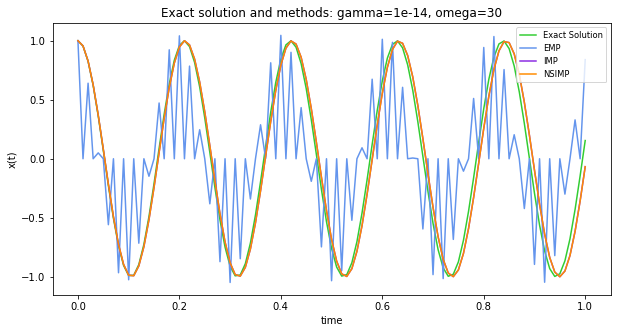

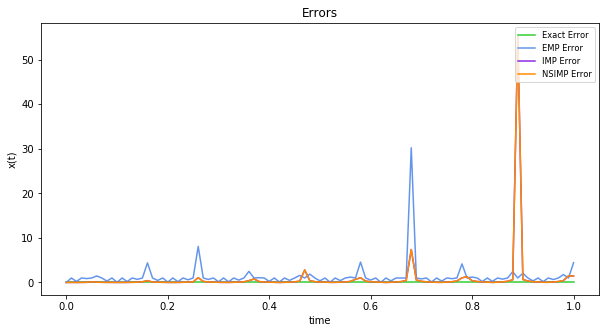


Testing using: steps = 100, x0 = 1, gamma = 1e-14, omega = 30.



  n     t           EMP         IMP       NSIMP    EMP Error     IMP Error    NSIMP Error    Exact Solution
---  ----  ------------  ----------  ----------  -----------  ------------  -------------  ----------------
  0  0      1             1           1            0           0              0                  1
  1  0.01   2e-16         0.95599     0.95599      1           0.000684294    0.000684294        0.955336
  2  0.02   0.64          0.827835    0.827835     0.224558    0.00302784     0.00302784         0.825336
  3  0.03   4.72e-16      0.626813    0.626813     1           0.00837081     0.00837081         0.62161
  4  0.04   0.0496        0.37062     0.37062      0.863119    0.0228021      0.0228021          0.362358
  5  0.05   8.1024e-16    0.0818053   0.0818053    1           0.156468       0.156468           0.0707372
  6  0.06  -0.558656     -0.21421    -0.21421      1.45885     0.0571827      0.0571827 

In [18]:
steps = 100
x0 = 1
gamma = 1e-14
omega = 30
main()

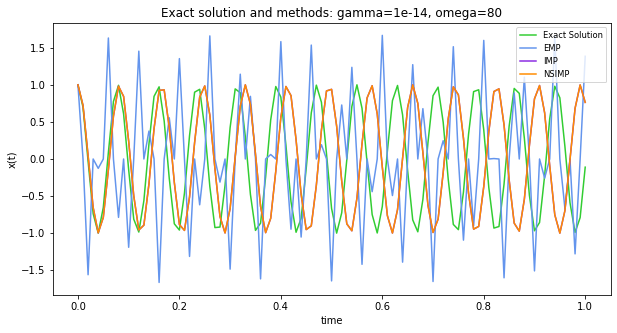

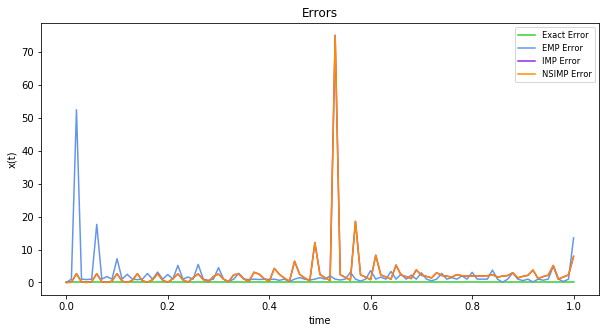


Testing using: steps = 100, x0 = 1, gamma = 1e-14, omega = 80.



  n     t           EMP          IMP        NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ------------  -----------  -----------  -----------  -----------  -------------  ----------------
  0  0      1             1            1             0            0              0                 1
  1  0.01   2e-16         0.724138     0.724138      1            0.0393727      0.0393727         0.696707
  2  0.02  -1.56          0.0487515    0.0487515    52.4255       2.6696         2.6696           -0.0291995
  3  0.03   9.12e-16     -0.653532    -0.653532      1            0.113727       0.113727         -0.737394
  4  0.04  -0.1264       -0.995247    -0.995247      0.873384     0.0030534      0.0030534        -0.998295
  5  0.05  -1.28416e-15  -0.787859    -0.787859      1            0.205335       0.205335         -0.653644
  6  0.06   1.63078      -0.145791    -0.145791     17.6377       2.6662 

In [19]:
steps = 100
x0 = 1
gamma = 1e-14
omega = 80
main()

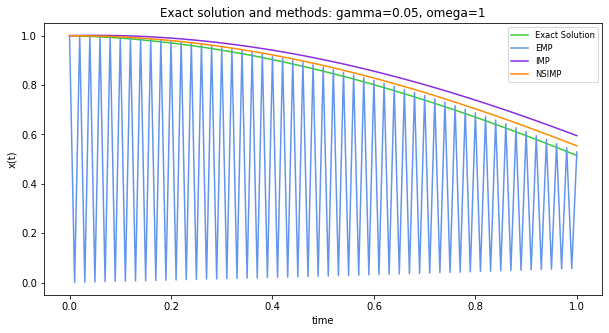

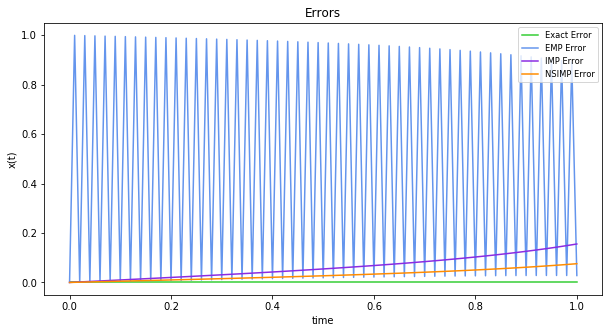


Testing using: steps = 100, x0 = 1, gamma = 0.05, omega = 1.



  n     t         EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1           1         1          0            0             0                    1
  1  0.01  0.001       1.00045   0.99995    0.998999     0.00100004    0.000499888          0.99945
  2  0.02  0.999598    1.0008    0.9998     0.00079775   0.00200028    0.000999628          0.998801
  3  0.03  0.0020004   1.00105   0.999549   0.997996     0.00300092    0.00149932           0.998053
  4  0.04  0.998794    1.0012    0.999199   0.00159291   0.00400216    0.00199906           0.997206
  5  0.05  0.00300162  1.00125   0.998749   0.996987     0.0050042     0.00249895           0.99626
  6  0.06  0.997589    1.00119   0.9982     0.0023853    0.00600725    0.00299909           0.995215
  7  0.07  0.00400404  1.00104   0.

In [21]:
steps = 100
x0 = 1
gamma = 0.05
omega = 1
main()

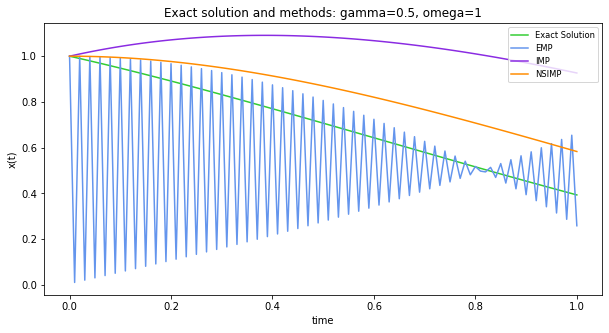

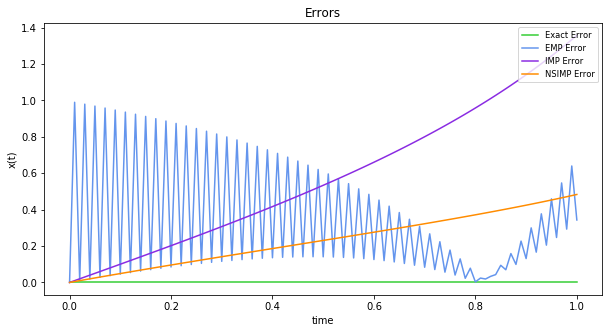


Testing using: steps = 100, x0 = 1, gamma = 0.5, omega = 1.



  n     t        EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ---------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1          1         1          0             0             0                   1
  1  0.01  0.01       1.00493   0.999938   0.989949      0.0100003     0.00498756          0.994975
  2  0.02  0.9994     1.0097    0.999752   0.00959557    0.0200022     0.00995075          0.989901
  3  0.03  0.020008   1.01433   0.999443   0.979683      0.030007      0.0148902           0.984779
  4  0.04  0.9982     1.01881   0.999013   0.0189764     0.0400164     0.0198064           0.979611
  5  0.05  0.030032   1.02315   0.998463   0.969179      0.0500317     0.0247002           0.974396
  6  0.06  0.9964     1.02734   0.997795   0.028133      0.0600546     0.0295719           0.969136
  7  0.07  0.04008    1.03138   0.997009   

In [22]:
steps = 100
x0 = 1
gamma = 0.5
omega = 1
main()

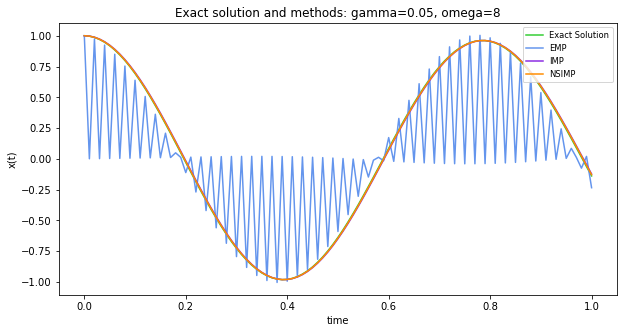

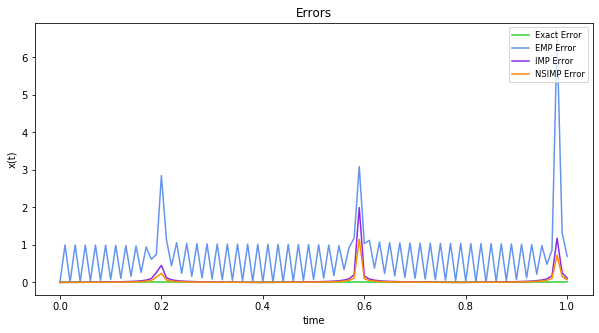


Testing using: steps = 100, x0 = 1, gamma = 0.05, omega = 8.



  n     t          EMP         IMP       NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  -----------  ----------  ----------  -----------  -----------  -------------  ----------------
  0  0      1            1           1          0            0              0                   1
  1  0.01   0.001        0.997306    0.996806   0.998996     0.00100582     0.000504094         0.996304
  2  0.02   0.974398     0.988245    0.987248   0.0120083    0.00203153     0.00102134          0.986241
  3  0.03   0.0020256    0.972881    0.971395   0.997911     0.00309104     0.00155882          0.969883
  4  0.04   0.923849     0.95132     0.949353   0.0247972    0.00419992     0.00212453          0.947341
  5  0.05   0.00310045   0.923704    0.921271   0.996625     0.00537632     0.0027279           0.918764
  6  0.06   0.849648     0.890216    0.887332   0.0392317    0.00664233     0.00338044          0.88

In [28]:
steps = 100
x0 = 1
gamma = 0.05
omega = 8
main()

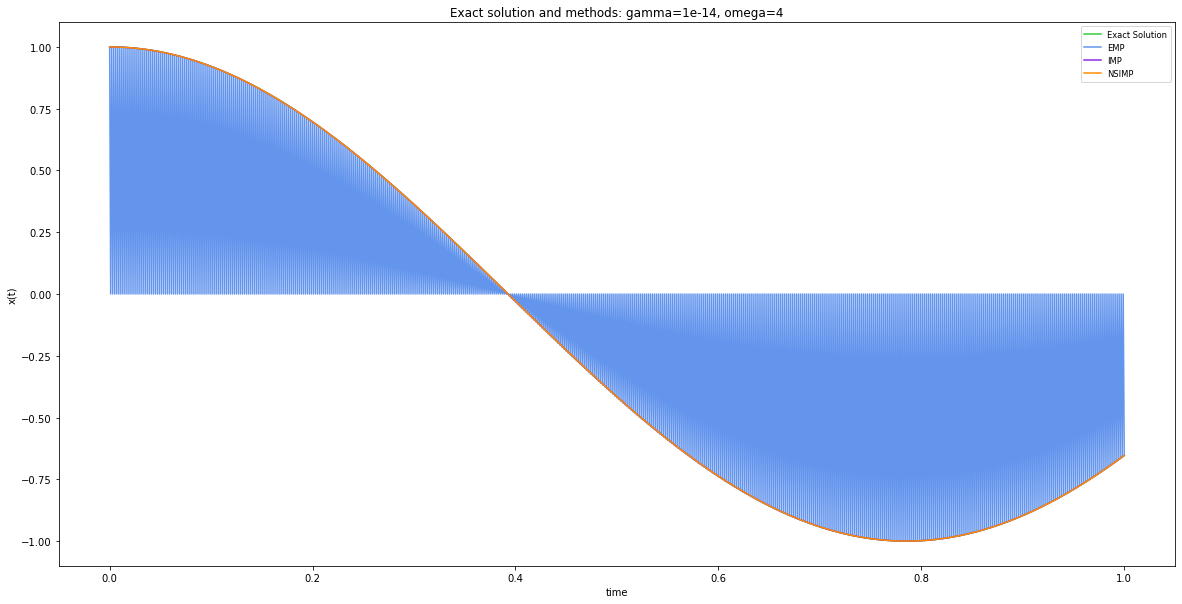

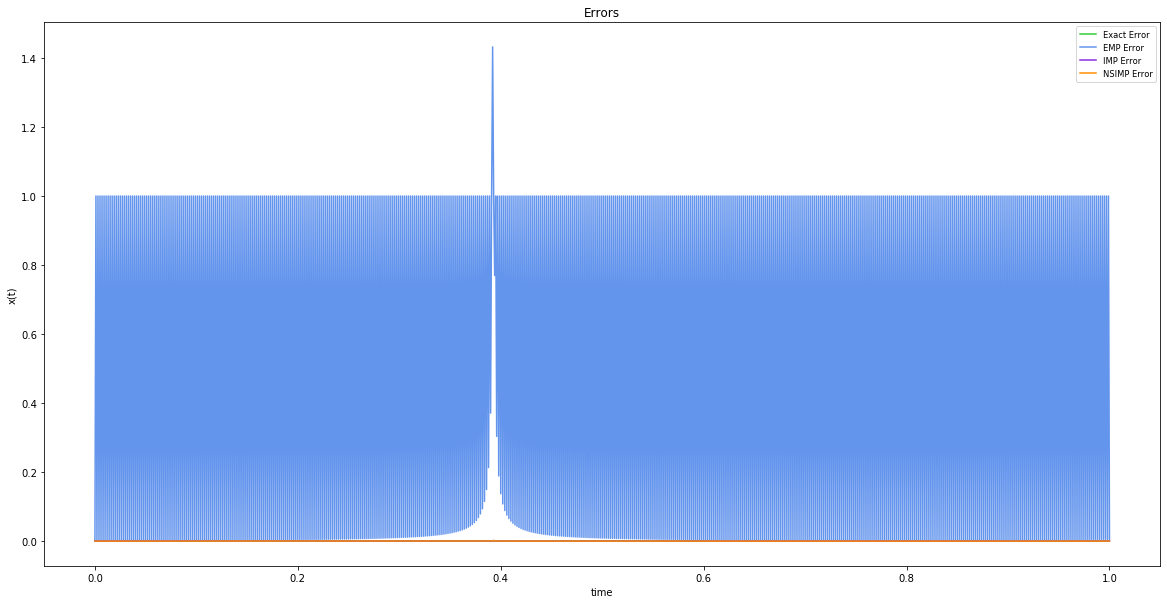


Testing using: steps = 1000, x0 = 1, gamma = 1e-14, omega = 4.



   n      t           EMP          IMP        NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
----  -----  ------------  -----------  -----------  -----------  -----------  -------------  ----------------
   0  0       1             1            1           0            0              0                  1
   1  0.001   2e-17         0.999992     0.999992    1            2.13334e-11    2.13334e-11        0.999992
   2  0.002   0.999936      0.999968     0.999968    3.20012e-05  8.5335e-11     8.5335e-11         0.999968
   3  0.003   4.00013e-17   0.999928     0.999928    1            1.92009e-10    1.92009e-10        0.999928
   4  0.004   0.999808      0.999872     0.999872    6.40068e-05  3.41362e-10    3.41362e-10        0.999872
   5  0.005   6.00051e-17   0.9998       0.9998      1            5.33403e-10    5.33403e-10        0.9998
   6  0.006   0.999616      0.999712     0.999712    9.6021e-05   

In [33]:
steps = 1000
x0 = 1
gamma = 1e-14
omega = 4
main()

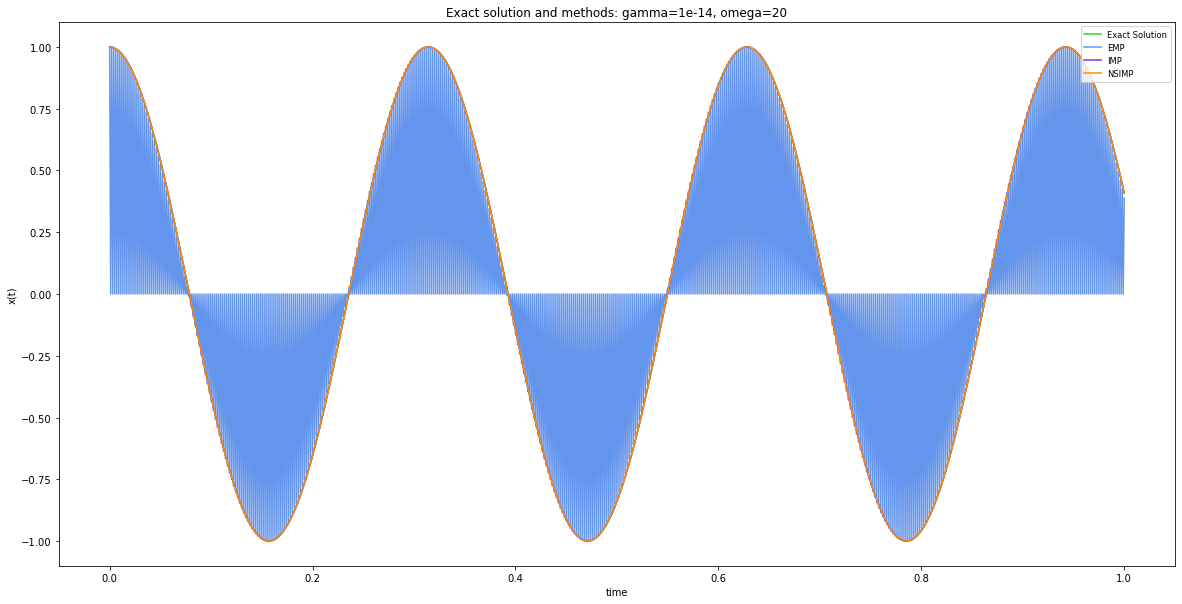

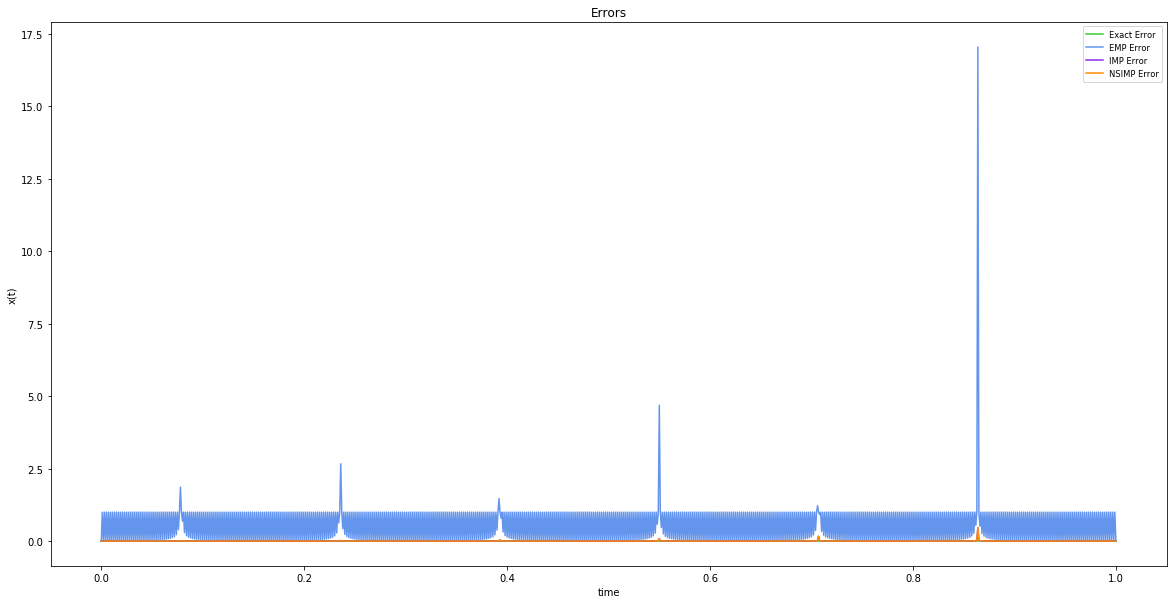


Testing using: steps = 1000, x0 = 1, gamma = 1e-14, omega = 20.



   n      t           EMP          IMP        NSIMP     EMP Error    IMP Error    NSIMP Error    Exact Solution
----  -----  ------------  -----------  -----------  ------------  -----------  -------------  ----------------
   0  0       1             1            1            0            0              0                  1
   1  0.001   2e-17         0.9998       0.9998       1            1.33341e-08    1.33341e-08        0.9998
   2  0.002   0.9984        0.9992       0.9992       0.000800747  5.33577e-08    5.33577e-08        0.9992
   3  0.003   4.0032e-17    0.998201     0.998201     1            1.20135e-07    1.20135e-07        0.998201
   4  0.004   0.995203      0.996802     0.996802     0.00160428   2.13773e-07    2.13773e-07        0.996802
   5  0.005   6.01278e-17   0.995004     0.995004     1            3.34423e-07    3.34423e-07        0.995004
   6  0.006   0.990413      0.992809     0.992809     0.002

In [34]:
steps = 1000
x0 = 1
gamma = 1e-14
omega = 20
main()

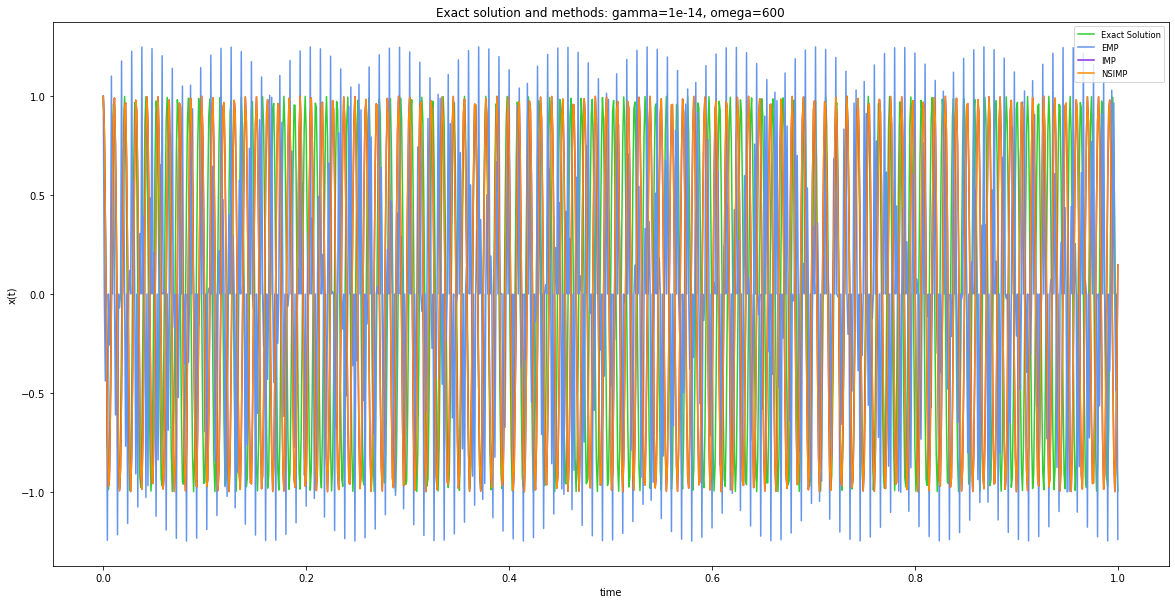

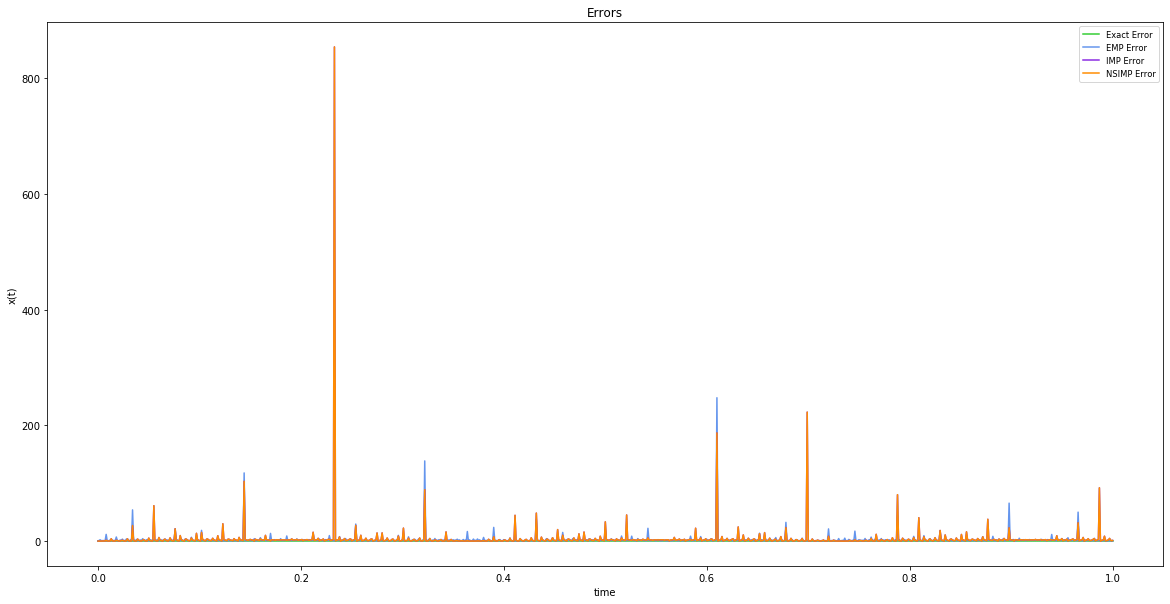


Testing using: steps = 1000, x0 = 1, gamma = 1e-14, omega = 600.



   n      t           EMP           IMP         NSIMP     EMP Error      IMP Error    NSIMP Error    Exact Solution
----  -----  ------------  ------------  ------------  ------------  -------------  -------------  ----------------
   0  0       1             1             1              0             0              0                 1
   1  0.001   2e-17         0.834862      0.834862       1             0.0115429      0.0115429         0.825336
   2  0.002  -0.44          0.39399       0.39399        2.21427       0.0872967      0.0872967         0.362358
   3  0.003   6.88e-17     -0.177007     -0.177007       1             0.220928       0.220928         -0.227202
   4  0.004  -1.2464       -0.689543     -0.689543       0.690277      0.0648915      0.0648915        -0.737394
   5  0.005   5.0784e-17   -0.97434      -0.97434        1             0.0158103      0.0158103        -0.989992
   6  0.006  -0.257984     -

In [45]:
steps = 1000
x0 = 1
gamma = 1e-14
omega = 600
main()